In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pylab as pl 
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Collection and Analysis

In [2]:
#Get Digits dataset as dictionary
digits = load_digits()

In [3]:
#Analyze first image target
print(digits.target[0])

0


In [4]:
#Analyze first image Pixels [0 to 255]
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

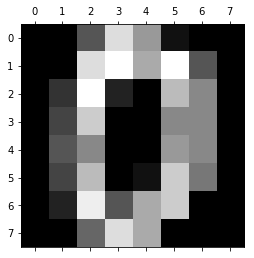

In [5]:
#Analyze a sample image
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

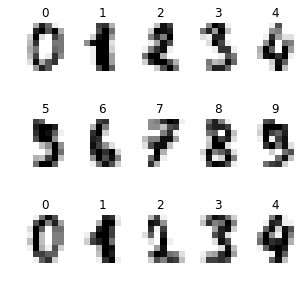

In [6]:
#Visualize first 15 images wtih their targets

images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

# 2. Feature Engineering.. SKIP
# 3. Feature Selection.. SKIP

# 4. Modelling

In [7]:
#Extract columns for X features and y targets
num_samples=len(digits.images)
X = digits.images.reshape(num_samples, -1)
y = digits.target

#Normalize X
X = X-X.mean()/X.std()

#Split dataset into 2/3 for training and 1/3 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [8]:
model1 = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

model2 = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# 5. Evaluation

In [9]:
# Evaluate percentage of test correctly predicted

for ix, model in enumerate([model1, model2]):
    score = model.score(X_test, y_test)
    print("Model_%d Score:\t %.2f"%(ix+1, score))

Model_1 Score:	 0.91
Model_2 Score:	 0.96


Model 2 is more accurate

<Figure size 432x288 with 0 Axes>

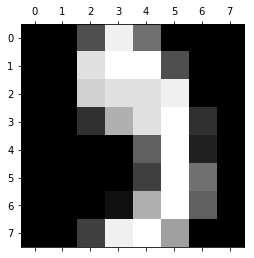

Prediction:	 9
Correct:	 9


In [10]:
i=233

pl.gray() 
pl.matshow(digits.images[i]) 
pl.show() 
pred=model2.predict(digits.images[i].reshape(1, -1))
print("Prediction:\t %d"%(pred))
print("Correct:\t %d"%(digits.target[i]))

In [11]:
#Checking probability

proba_list=model2.predict_proba(digits.images[i].reshape(1, -1))[0]
for target, probability in enumerate(proba_list):
    print("Target: %d \tProbability: %.2f"%(target,probability))

Target: 0 	Probability: 0.00
Target: 1 	Probability: 0.10
Target: 2 	Probability: 0.00
Target: 3 	Probability: 0.00
Target: 4 	Probability: 0.10
Target: 5 	Probability: 0.10
Target: 6 	Probability: 0.00
Target: 7 	Probability: 0.00
Target: 8 	Probability: 0.10
Target: 9 	Probability: 0.60
